In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sns.set_palette("Set2")
sns.set_style("ticks")

In [7]:
train_value = pd.read_csv('train_values.csv')
df_test = pd.read_csv('test_values.csv')
train_labels = pd.read_csv('train_labels.csv')


In [8]:
train_value.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [10]:
# convert_features = ["land_surface_condition","foundation_type", "roof_type", "ground_floor_type", "other_floor_type","position", "plan_configuration", "legal_ownership_status"]
# def convert(df,features):
#   for feature in features:
#     df[feature] = df[feature].astype("category")
# convert(df_train,convert_features)
# convert(df_test,convert_features)

## **Datatype**

In [11]:
train_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [12]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [13]:
train_value.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Missing Values**

In [14]:
train_value.isnull().sum() 

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [15]:
train_labels.isnull().sum() 

building_id     0
damage_grade    0
dtype: int64

In [16]:
df_test.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Dữ liệu khá clean

## **Explore Data**

In [17]:
train_value= train_value.merge(train_labels, on='building_id')

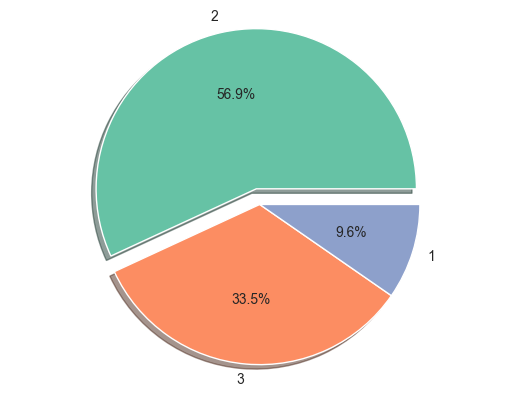

In [18]:
percent = list(train_value['damage_grade'].value_counts()/len(train_value['damage_grade'])*100)
label = list(train_value['damage_grade'].value_counts().index)
explode = (0.1,0,0)
fig,ax1 = plt.subplots()
ax1.pie(percent, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

Có thể dễ dàng nhận thấy rằng tập dữ liệu rất mất cân bằng. Lý do khiến tập dữ liệu này mất cân bằng có thể là do dữ liệu được thu thập sau trận động đất ở Nepal năm 2015 và rất có thể mức độ thiệt hại của các tòa nhà có mối tương quan cao với cường độ của trận động đất.

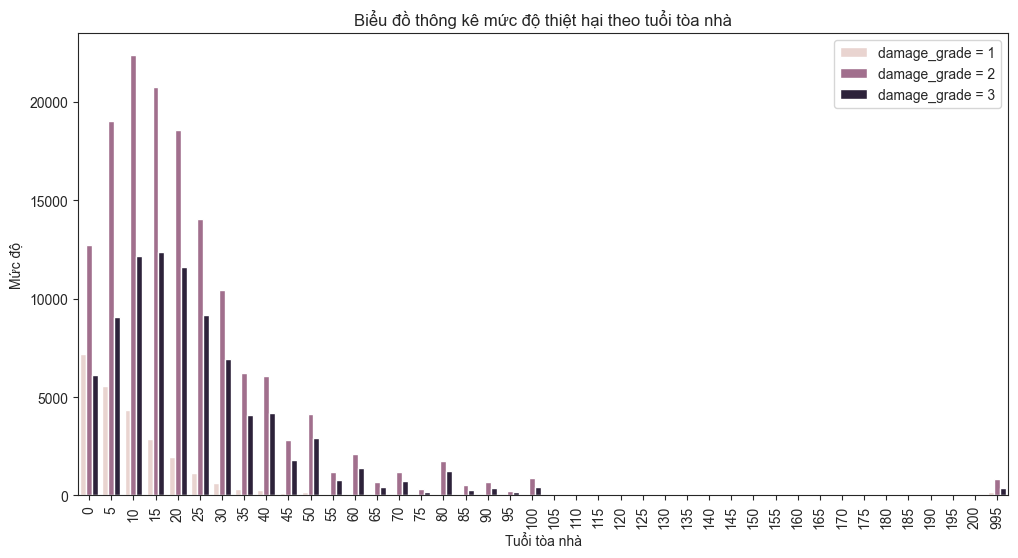

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_value["age"],hue=train_labels["damage_grade"])
plt.ylabel("Mức độ")
plt.xlabel("Tuổi tòa nhà")
plt.xticks(rotation=90)
plt.title("Biểu đồ thông kê mức độ thiệt hại theo tuổi tòa nhà")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Ta có thể thấy rằng xuất hiện những tòa nhà 995 năm tuổi khá cũ, tuy nhiên từ khoảng 105-200 gần như không có số liệu, cho nên ta cần xử lí các ngoại lệ này, damage_grade 2 xuất hiện cao nhất ở những toà nhà dao động từ 5-20 tuổi

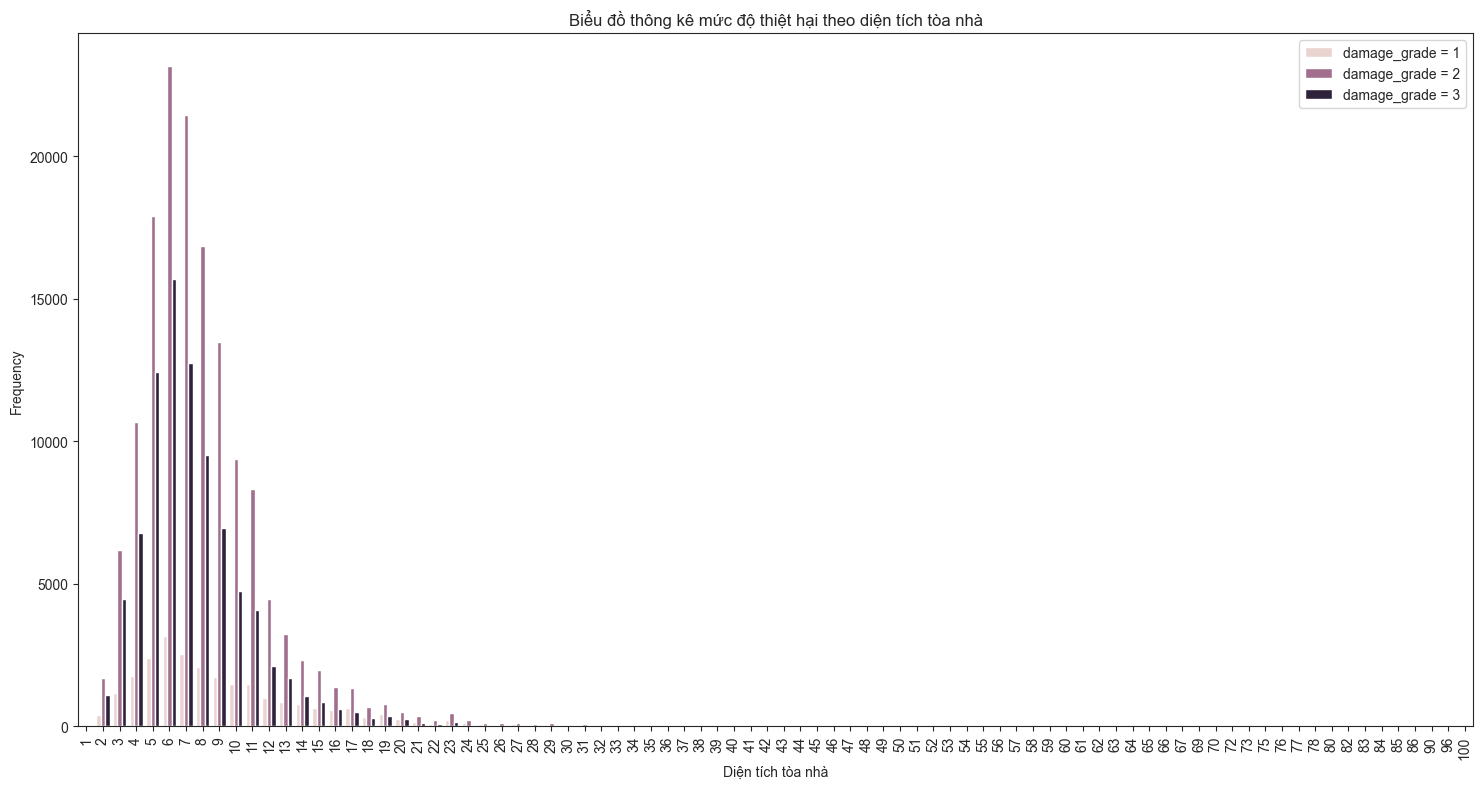

In [20]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_value["area_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Diện tích tòa nhà")
plt.xticks(rotation=90)
plt.title("Biểu đồ thông kê mức độ thiệt hại theo diện tích tòa nhà")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Diện tích tiêu chuẩn của diện tích tòa nhà là dưới 20% đối với hầu hết các tòa nhà, cần ngoại lệ các con số từ 20 đổ lên

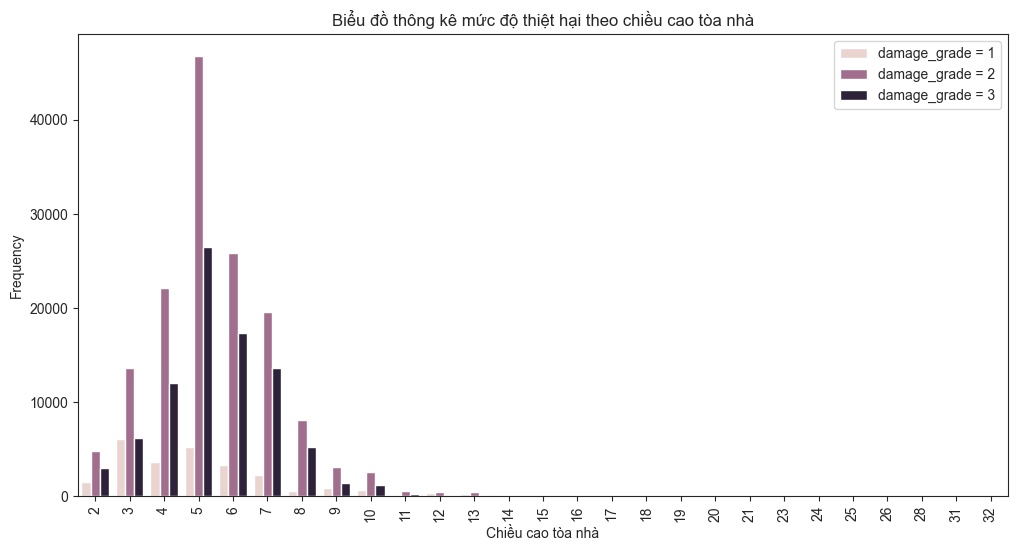

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_value["height_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Chiều cao tòa nhà")
plt.xticks(rotation=90)
plt.title("Biểu đồ thông kê mức độ thiệt hại theo chiều cao tòa nhà")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Hầu hết dữ liệu cho chiều cao tòa nhà nhỏ hơn 10% nhưng chỉ có một số ít tòa nhà có giá trị lên tới 32%.

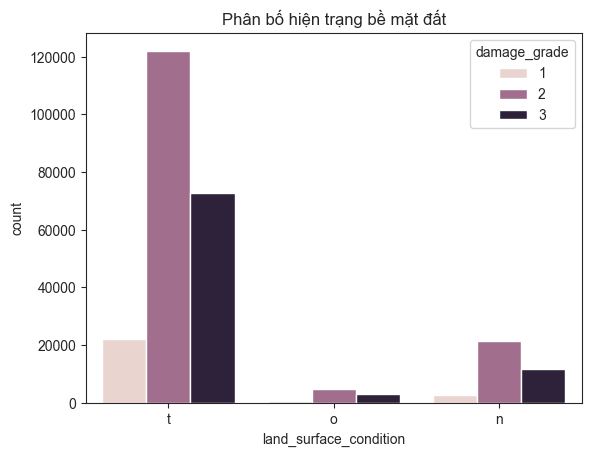

In [22]:
sns.countplot(x = train_value["land_surface_condition"], hue = train_labels["damage_grade"])
plt.title("Phân bố hiện trạng bề mặt đất")
plt.show()

Đây là một biến phân loại cho biết tình trạng bề mặt của đất nơi tòa nhà được xây dựng. Các giá trị có thể có: n, o, t.

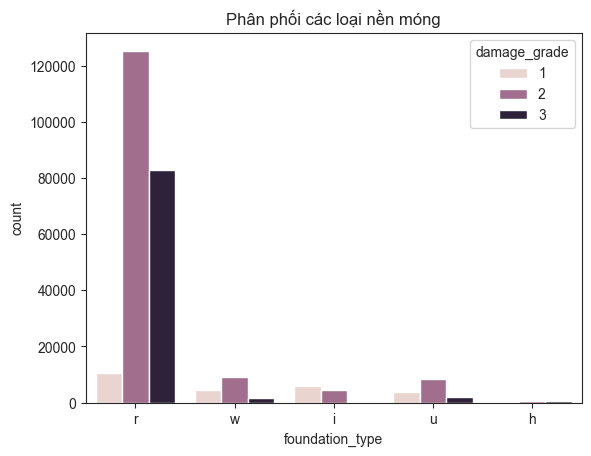

In [23]:
sns.countplot(x = train_value["foundation_type"], hue = train_labels["damage_grade"])
plt.title("Phân phối các loại nền móng")
plt.show()

Đây là một biến phân loại cho biết loại nền móng được sử dụng khi xây dựng. Các giá trị có thể có: h, i, r, u, w.

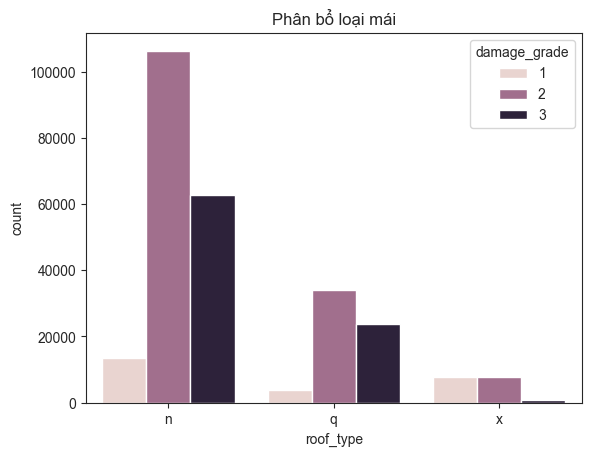

In [24]:
sns.countplot(x = train_value["roof_type"], hue = train_labels["damage_grade"])
plt.title("Phân bổ loại mái")
plt.show()

Đây là một biến phân loại cho biết loại mái được sử dụng khi xây dựng. Các giá trị có thể có: n, q, x

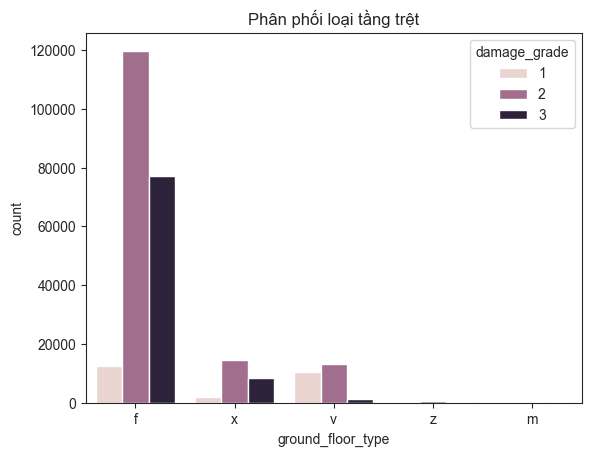

In [25]:
sns.countplot(x = train_value["ground_floor_type"], hue = train_labels["damage_grade"])
plt.title("Phân phối loại tầng trệt")
plt.show()

Đây là một biến phân loại cho biết loại tầng trệt. Các giá trị có thể có: f, m, v, x, z.

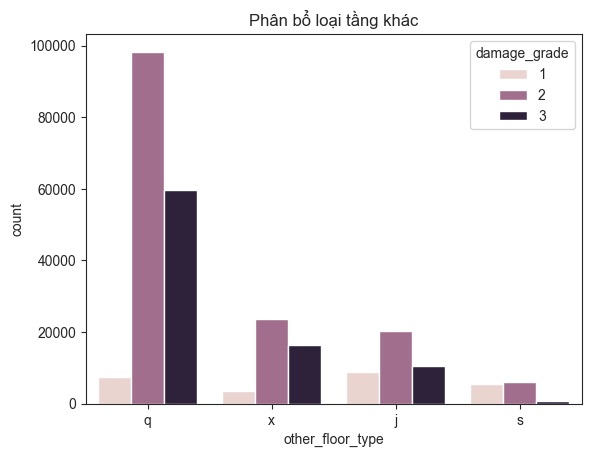

In [26]:
sns.countplot(x = train_value["other_floor_type"], hue = train_labels["damage_grade"])
plt.title("Phân bổ loại tầng khác")
plt.show()

Đây là một biến phân loại cho biết loại công trình được sử dụng ở tầng cao hơn tầng trệt (trừ mái nhà). Các giá trị có thể có: j, q, s, x.

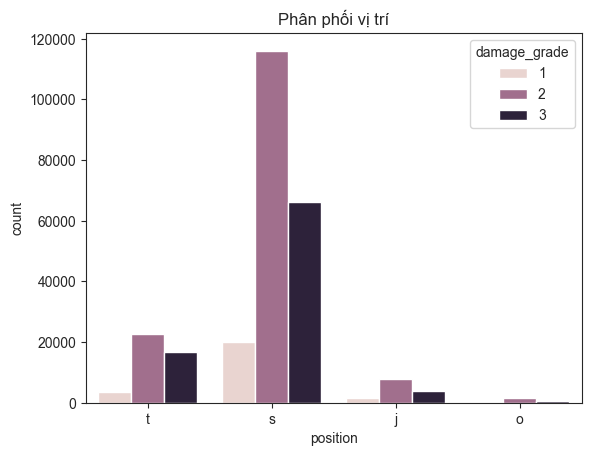

In [27]:
sns.countplot(x = train_value["position"], hue = train_labels["damage_grade"])
plt.title("Phân phối vị trí")
plt.show()

Đây là một biến phân loại cho biết vị trí của tòa nhà. Các giá trị có thể có: j, o, s, t.

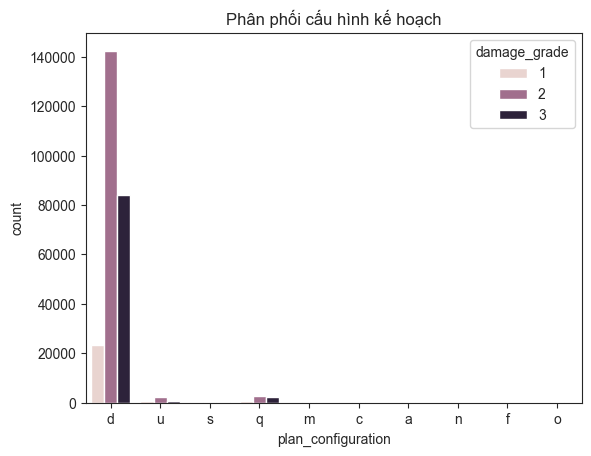

In [28]:
sns.countplot(x = train_value["plan_configuration"], hue = train_labels["damage_grade"])
plt.title("Phân phối cấu hình kế hoạch")
plt.show()

Đây là một biến phân loại cho biết cấu hình kế hoạch xây dựng. Các giá trị có thể có: a, c, d, f, m, n, o, q, s, u.

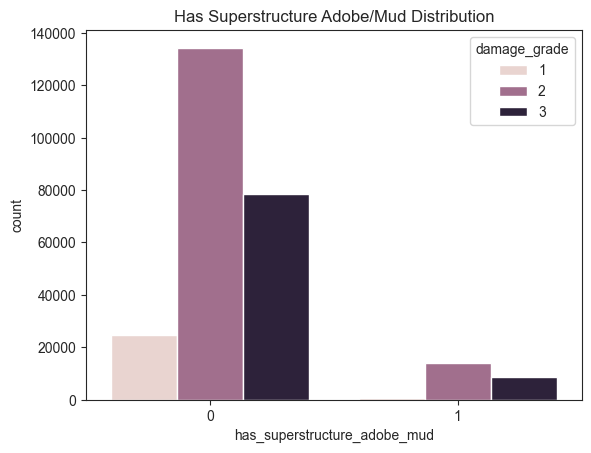

In [29]:
sns.countplot(x = train_value["has_superstructure_adobe_mud"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Adobe/Mud Distribution")
plt.show()

Đây là biến cờ cho biết liệu cấu trúc thượng tầng có được làm bằng Adobe/Mud hay không.

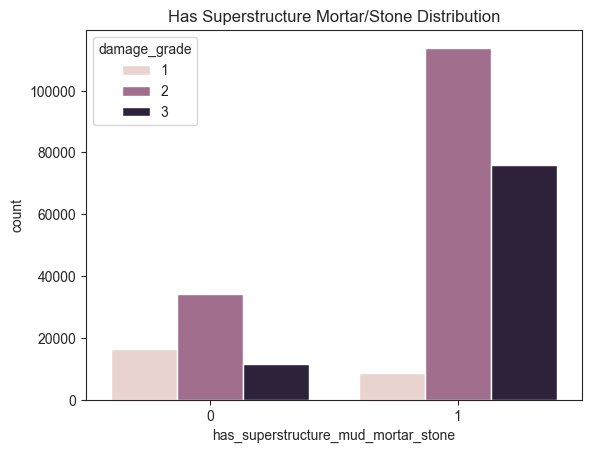

In [30]:
sns.countplot(x = train_value["has_superstructure_mud_mortar_stone"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Mortar/Stone Distribution")
plt.show()

Đây là biến cờ cho biết cấu trúc thượng tầng có được làm bằng Vữa Bùn - Đá hay không.

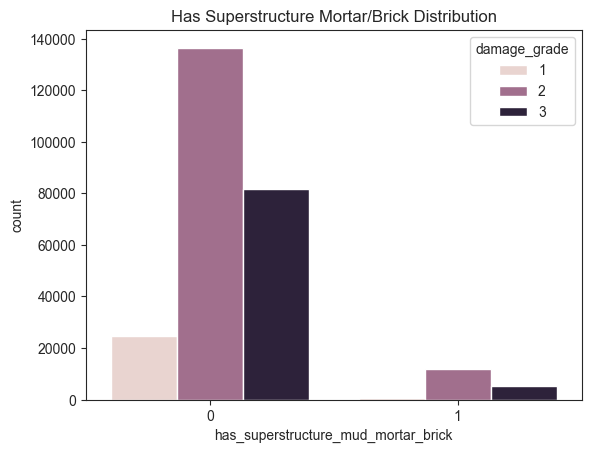

In [31]:
sns.countplot(x = train_value["has_superstructure_mud_mortar_brick"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Mortar/Brick Distribution")
plt.show()

Đây là biến cờ cho biết liệu cấu trúc thượng tầng có được làm bằng Vữa bùn - Gạch hay không.

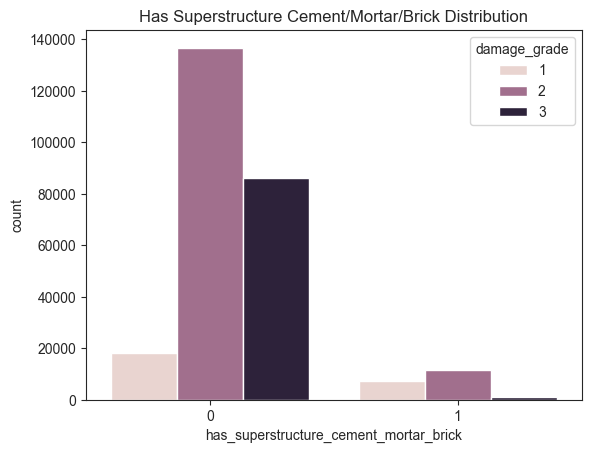

In [32]:
sns.countplot(x = train_value["has_superstructure_cement_mortar_brick"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Cement/Mortar/Brick Distribution")
plt.show()

Đây là biến cờ cho biết liệu cấu trúc thượng tầng có được làm bằng Vữa xi măng - Gạch hay không.

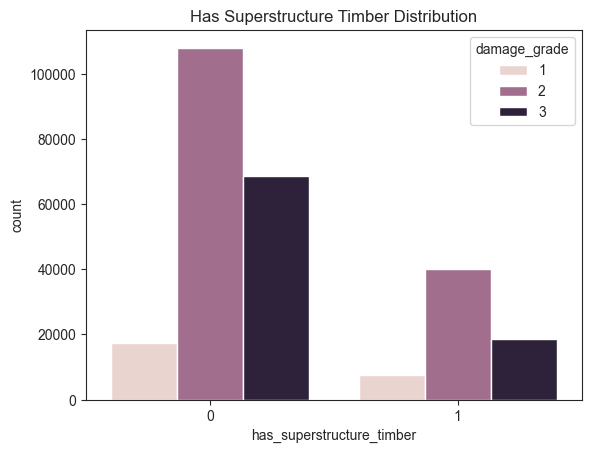

In [33]:
sns.countplot(x = train_value["has_superstructure_timber"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Timber Distribution")
plt.show()

Đây là biến cờ cho biết liệu cấu trúc thượng tầng có được làm bằng Gỗ hay không.

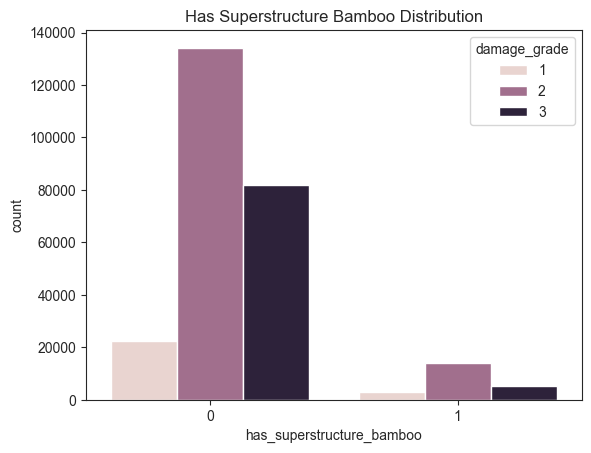

In [34]:
sns.countplot(x = train_value["has_superstructure_bamboo"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Bamboo Distribution")
plt.show()

Đây là biến cờ cho biết liệu cấu trúc thượng tầng có được làm bằng Tre hay không.

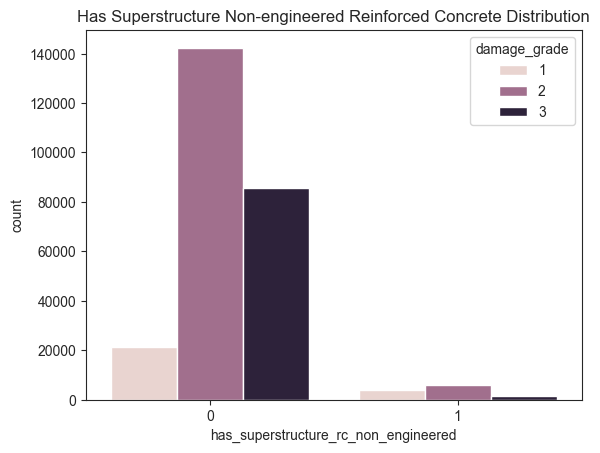

In [35]:
sns.countplot(x = train_value["has_superstructure_rc_non_engineered"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Non-engineered Reinforced Concrete Distribution")
plt.show()

Đây là biến cờ cho biết liệu cấu trúc thượng tầng có được làm bằng bê tông cốt thép không qua kỹ thuật hay không.

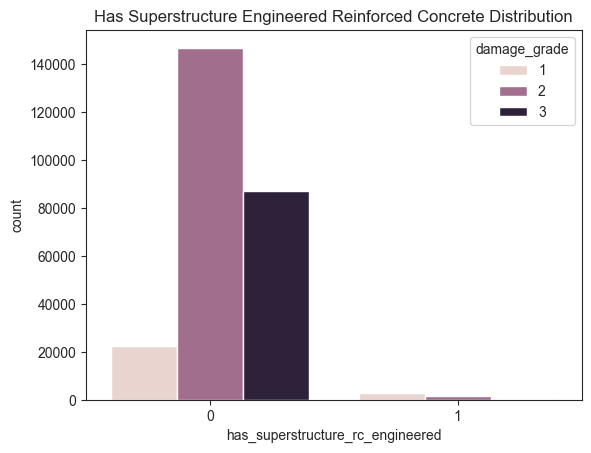

In [36]:
sns.countplot(x = train_value["has_superstructure_rc_engineered"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Engineered Reinforced Concrete Distribution")
plt.show()

Đây là biến cờ cho biết liệu cấu trúc thượng tầng có được làm bằng bê tông cốt thép được thiết kế hay không.

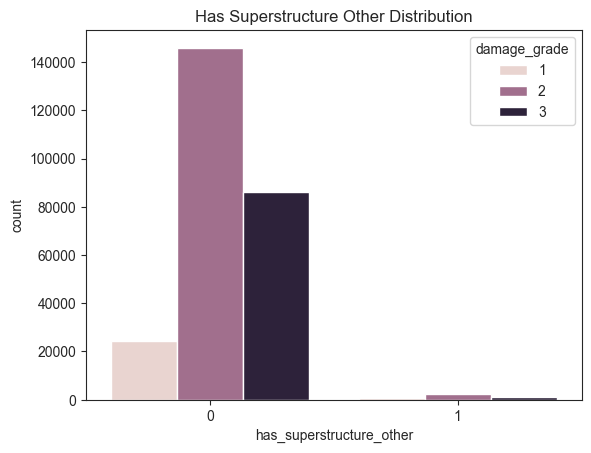

In [37]:
sns.countplot(x = train_value["has_superstructure_other"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Other Distribution")
plt.show()

Đây là biến cờ cho biết liệu cấu trúc thượng tầng có được làm bằng bất kỳ vật liệu nào khác hay không.

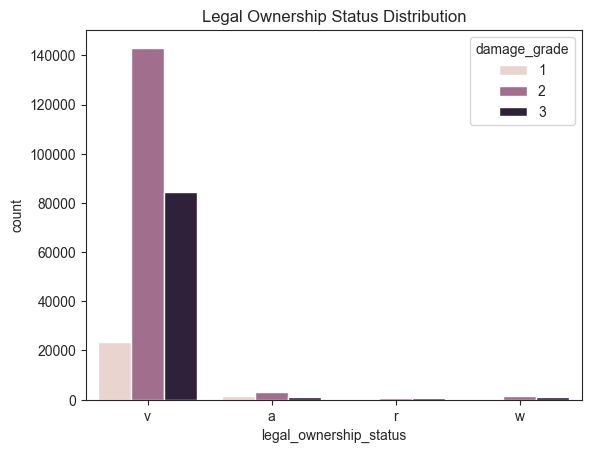

In [38]:
sns.countplot(x = train_value["legal_ownership_status"], hue = train_labels["damage_grade"])
plt.title("Legal Ownership Status Distribution")
plt.show()

Đây là biến phân loại cho biết tình trạng sở hữu hợp pháp của mảnh đất nơi tòa nhà được xây dựng. Các giá trị có thể có: a, r, v, w.

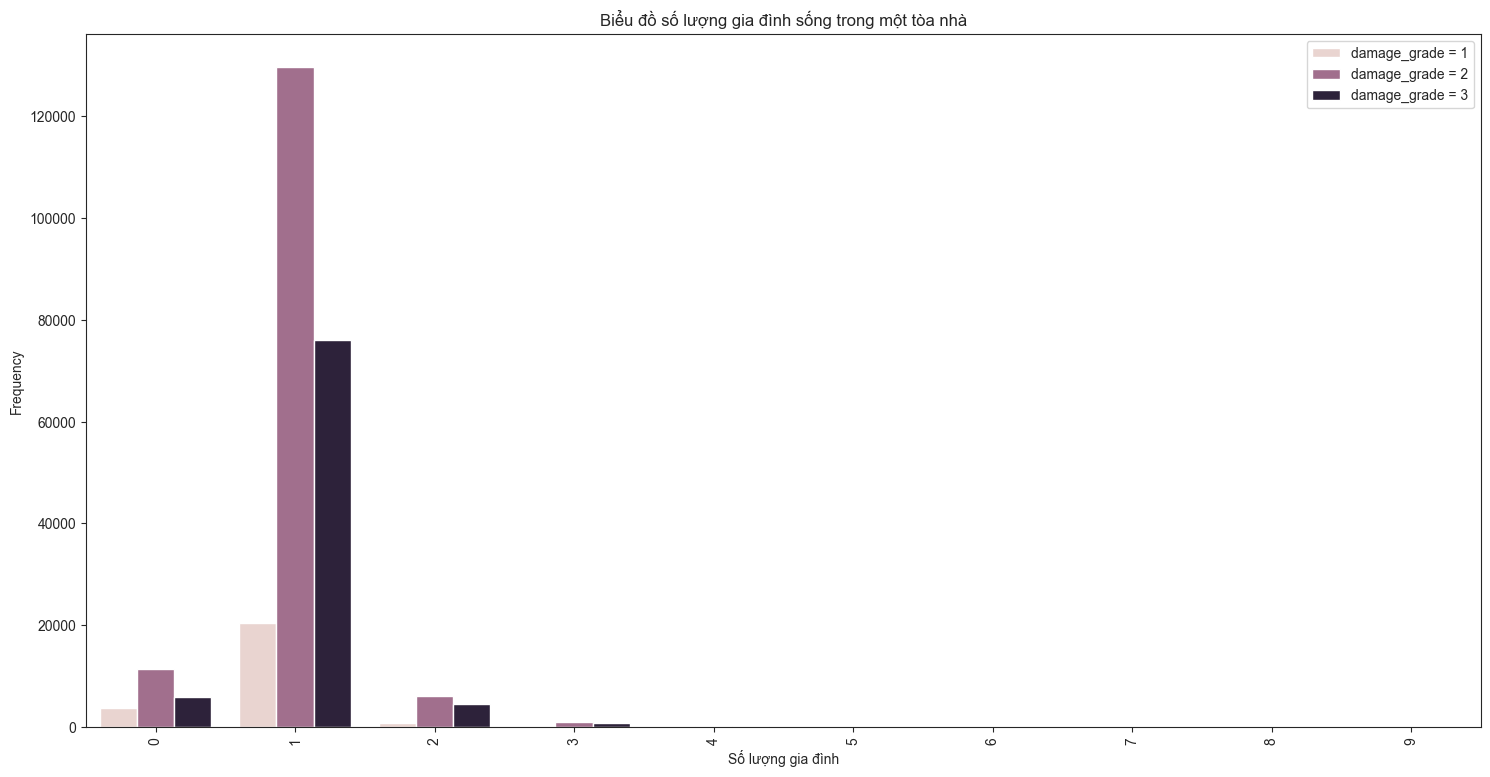

In [39]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_value["count_families"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Số lượng gia đình")
plt.xticks(rotation=90)
plt.title("Biểu đồ số lượng gia đình sống trong một tòa nhà")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Hầu hết các tòa nhà chỉ có 1 gia đình sống trong đó. Chúng tôi cũng có những tòa nhà có tới 9 gia đình đang sinh sống, những tòa nhà này có thể giống như những tòa nhà 9 tầng.

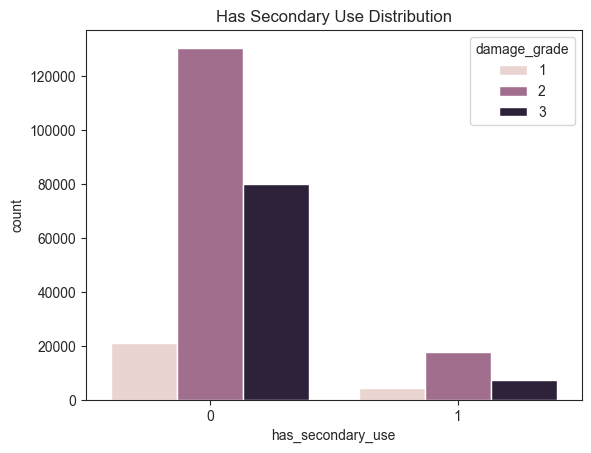

In [40]:
sns.countplot(x = train_value["has_secondary_use"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Distribution")
plt.show()

Đây là biến cờ cho biết liệu tòa nhà có được sử dụng cho bất kỳ mục đích phụ nào hay không.

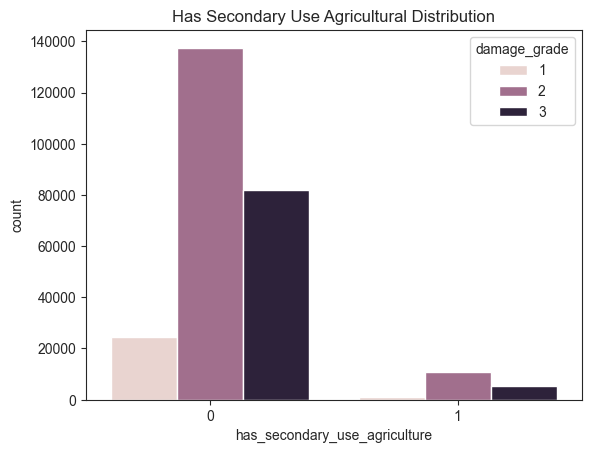

In [41]:
sns.countplot(x = train_value["has_secondary_use_agriculture"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Agricultural Distribution")
plt.show()

Đây là biến cờ cho biết tòa nhà có được sử dụng cho mục đích nông nghiệp hay không.

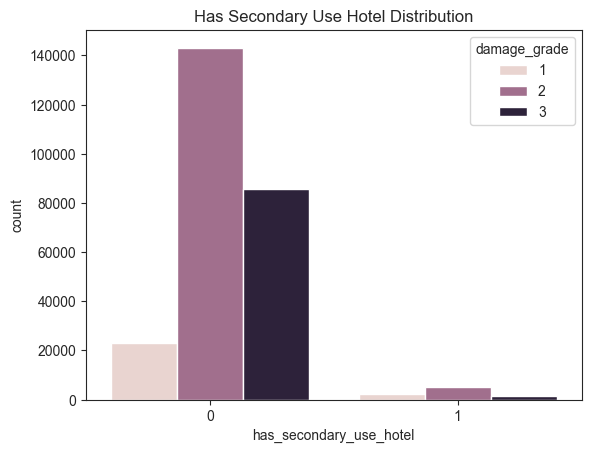

In [42]:
sns.countplot(x = train_value["has_secondary_use_hotel"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Hotel Distribution")
plt.show()

Đây là biến cờ cho biết tòa nhà có được sử dụng làm khách sạn hay không.

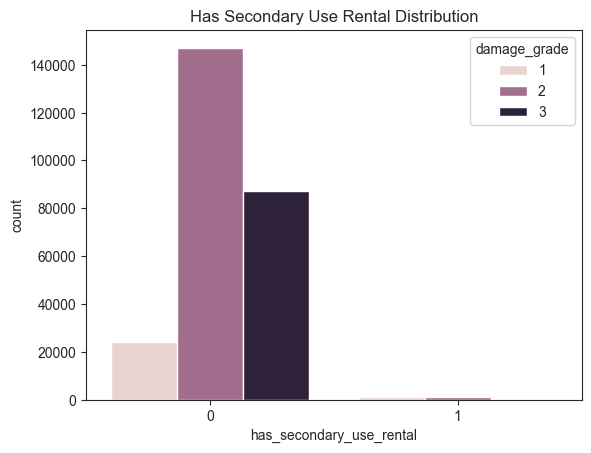

In [43]:
sns.countplot(x = train_value["has_secondary_use_rental"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Rental Distribution")
plt.show()

Đây là biến cờ cho biết tòa nhà có được sử dụng cho mục đích cho thuê hay không.

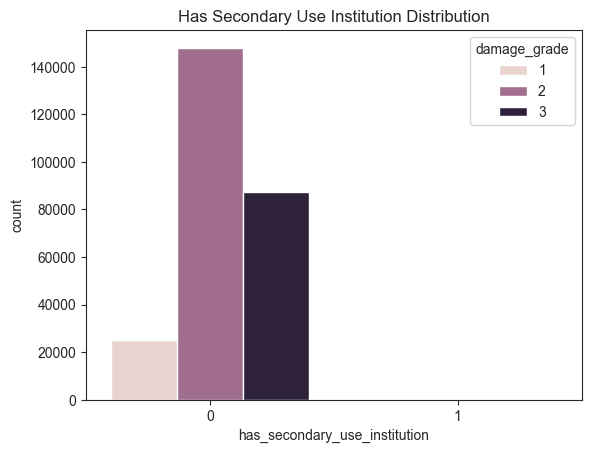

In [44]:
sns.countplot(x = train_value["has_secondary_use_institution"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Institution Distribution")
plt.show()

This is a flag variable that indicates if the building was used as a location of any institution.

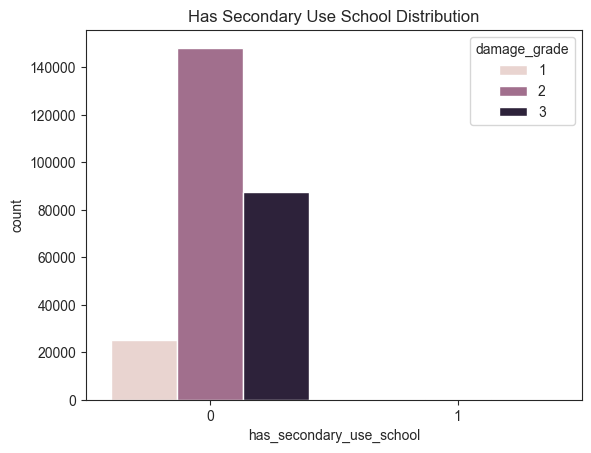

In [45]:
sns.countplot(x = train_value["has_secondary_use_school"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use School Distribution")
plt.show()

Đây là biến cờ cho biết tòa nhà có được sử dụng làm trường học hay không.

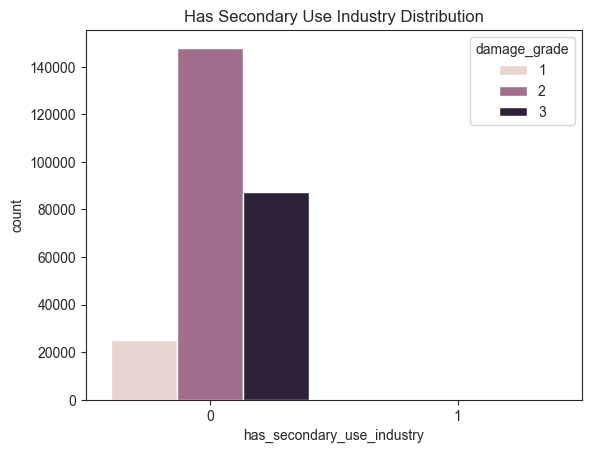

In [46]:
sns.countplot(x = train_value["has_secondary_use_industry"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Industry Distribution")
plt.show()

Đây là biến cờ cho biết tòa nhà có được sử dụng cho mục đích công nghiệp hay không.

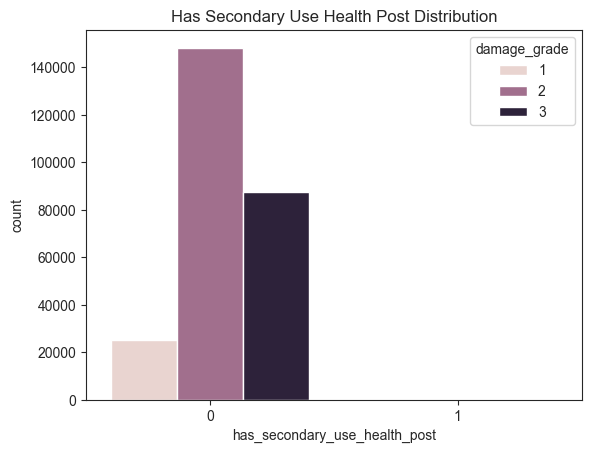

In [47]:
sns.countplot(x = train_value["has_secondary_use_health_post"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Health Post Distribution")
plt.show()

Đây là biến cờ cho biết tòa nhà có được sử dụng làm trạm y tế hay không.

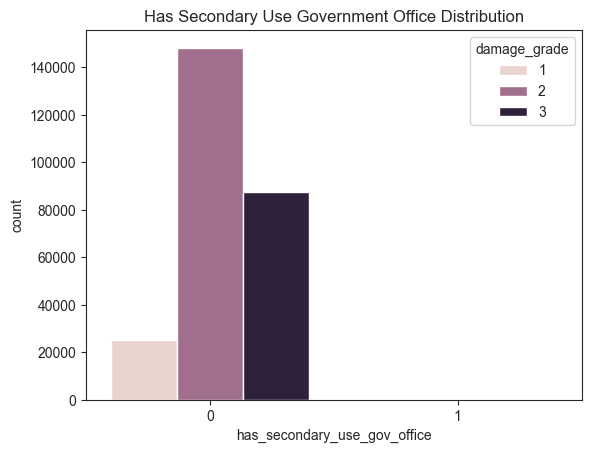

In [48]:
sns.countplot(x = train_value["has_secondary_use_gov_office"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Government Office Distribution")
plt.show()

Đây là biến cờ cho biết liệu tòa nhà có được sử dụng làm văn phòng chính phủ hay không.

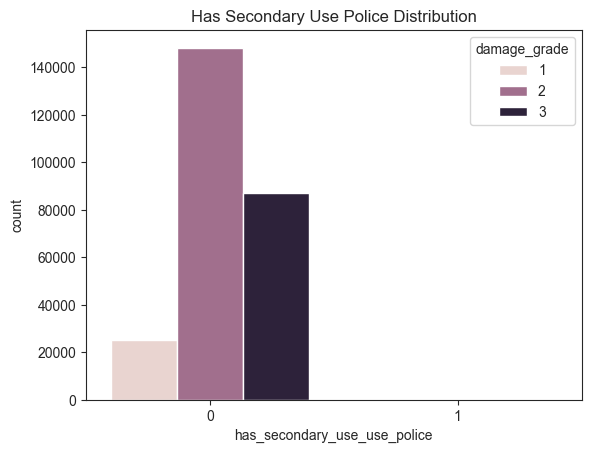

In [49]:
sns.countplot(x = train_value["has_secondary_use_use_police"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Police Distribution")
plt.show()

Đây là biến cờ cho biết tòa nhà có được sử dụng làm đồn cảnh sát hay không.

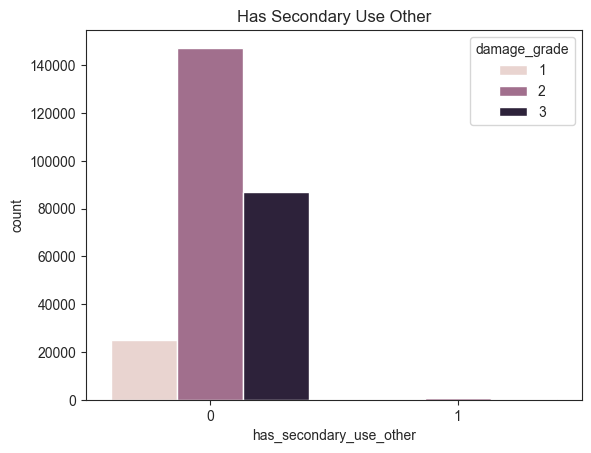

In [50]:
sns.countplot(x = train_value["has_secondary_use_other"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Other")
plt.show()

Đây là biến cờ cho biết liệu tòa nhà có được sử dụng lần thứ hai cho các mục đích khác hay không.

## **Ngoại lệ**


Rừng ngẫu nhiên là một mô hình học máy dựa trên cây quyết định, được cho là hoạt động mạnh mẽ ngay cả khi dữ liệu chứa các giá trị ngoại lệ. Tuy nhiên, đây là quan niệm sai lầm phổ biến...

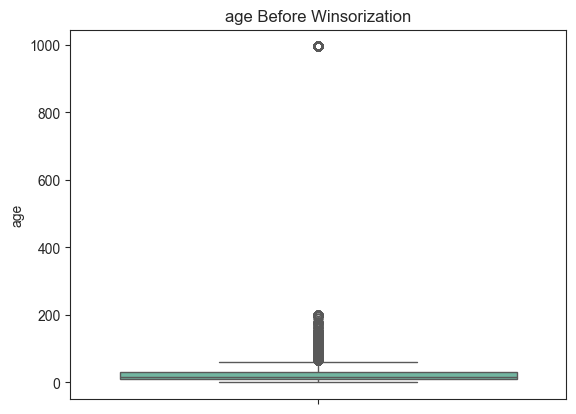

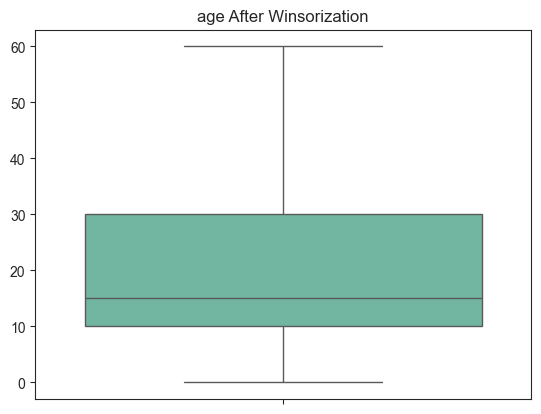

In [52]:
#Data source
name = "age"
data = train_value[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_value[name] = winsorized_data

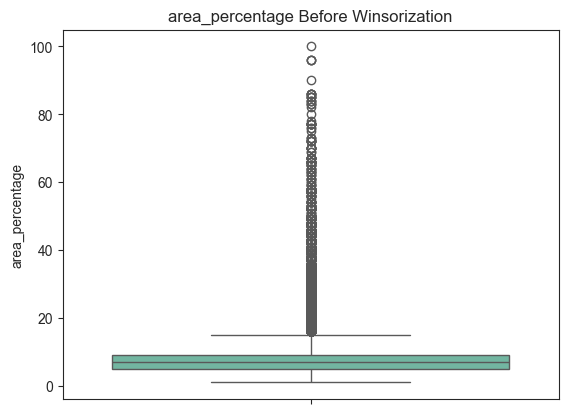

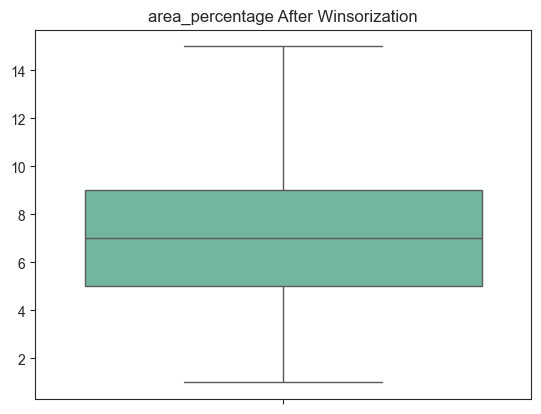

In [53]:
#Data source
name = "area_percentage"
data = train_value[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.055))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_value[name] = winsorized_data

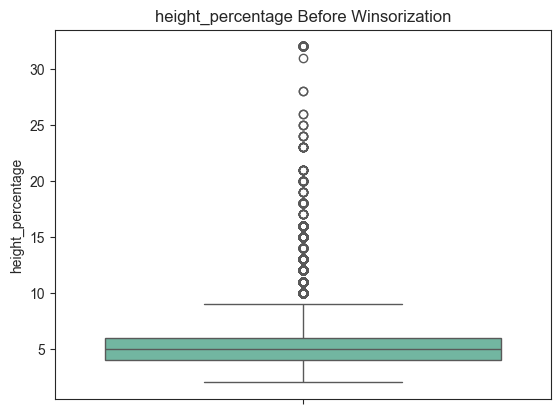

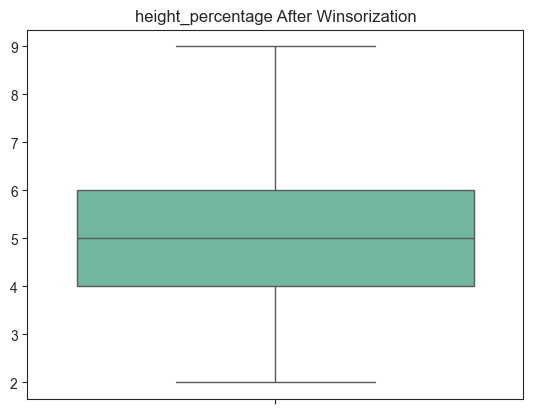

In [55]:
#Data source
name = "height_percentage"
data = train_value[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.04))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_value[name] = winsorized_data

## **Sự tương quan**

In [56]:
train_value.drop(columns=["building_id"], inplace=True)
train_labels.drop(columns=["building_id"], inplace=True)

In [57]:
train_values = pd.get_dummies(train_value, drop_first = True)

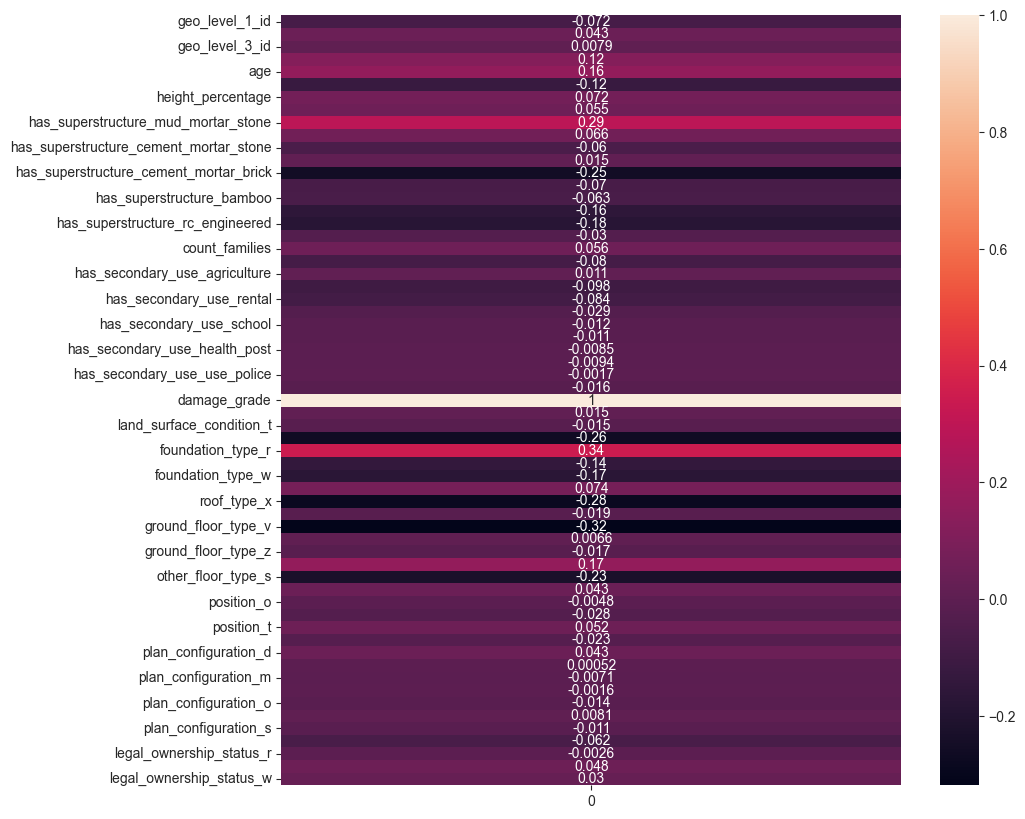

In [58]:
plt.figure(figsize=(10,10))
correlations = train_values.corrwith(train_labels["damage_grade"])
sns.heatmap(pd.DataFrame(correlations), annot=True)
plt.show()